### The purpose of this notebook is just to collect all the graphs used for deliverable in one place

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../../data/merged_311.csv')

C:\Users\USER\AppData\Local\Temp\ipykernel_9636\842667238.py:1: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../../data/merged_311.csv')


In [4]:
df.head()

,case_enquiry_id,open_dt,closed_dt,on_time,case_status,closure_reason,subject,reason,type,queue,...,HU100_RE,TotDis,TotChild,OlderAdult,Low_to_No,LEP,POC2,MedIllnes,Shape__Area,Shape__Length
0,101000295613,2011-06-30 21:32:33,2011-07-01 01:06:58,ONTIME,Closed,resolved,Public Works Department,Street Lights,Street Light Outages,PWDx_Street Light Outages,...,13517,5605,8859,4073,9531,13604,28276,12396.87,1.160770e+07,48622.467965
1,101000295614,2011-06-30 22:18:31,2011-07-01 02:12:43,ONTIME,Closed,closed,Public Works Department,Sanitation,Schedule a Bulk Item Pickup,PWDx_Schedule a Bulk Item Pickup,...,25153,7286,13324,8231,11249,19480,33106,24029.32,3.944750e+07,136415.602543
2,101000295615,2011-06-30 22:28:04,2011-08-01 11:21:46,ONTIME,Closed,resolved,Transportation - Traffic Division,Signs & Signals,New Sign Crosswalk or Pavement Marking,BTDT_Engineering_New Sign and Pavement Marking...,...,10180,2580,4758,3632,3622,7254,9121,9078.90,2.103707e+07,52799.508869
3,101000295616,2011-06-30 23:03:48,2011-07-22 12:13:45,OVERDUE,Closed,resolved,Public Works Department,Street Lights,Street Light Outages,PWDx_Street Light_Pending_Contractor (Internal),...,6592,2117,3256,2219,2683,4902,11132,6412.46,9.473516e+06,33527.343089
4,101000295617,2011-06-30 23:12:31,2011-07-01 02:12:38,ONTIME,Closed,resolved,Public Works Department,Highway Maintenance,Highway Maintenance,PWDx_District 03: North Dorchester,...,27507,9819,17424,6535,22749,29284,50778,25010.76,2.231120e+07,115494.076201


In [5]:
df['open_dt'] = pd.to_datetime(df['open_dt'])
df['closed_dt'] = pd.to_datetime(df['closed_dt'])

In [7]:
def fmt(x):
    # 1000 - K 
    # 1000000 - M
    # 1000000000 - B

    if x < 1000:
        return str(x)
    elif x < 1000000:
        return str(round(x/1000, 1)) + 'K'
    elif x < 1000000000:
        return str(round(x/1000000, 1)) + 'M'
    else:
        return str(round(x/1000000000, 1)) + 'B'

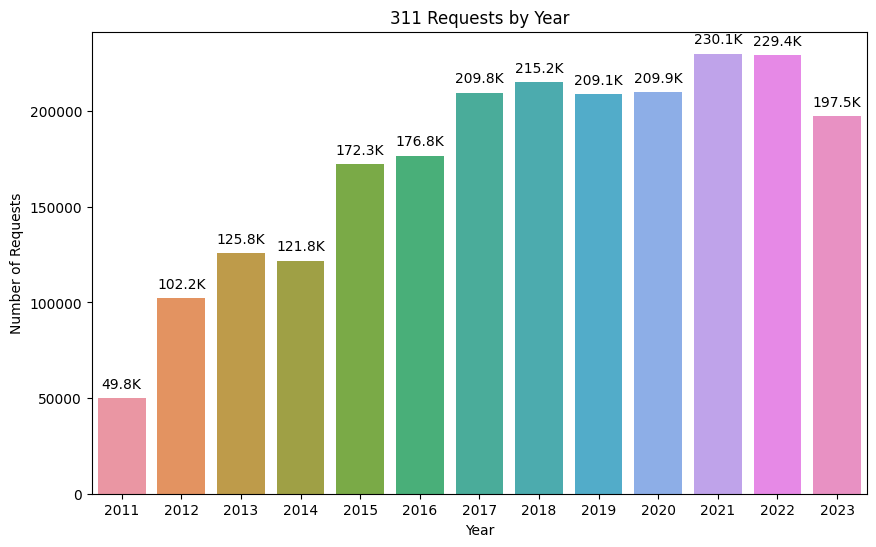

In [12]:
# volume by year
plt.figure(figsize=(10, 6))
fig = sns.countplot(x=df['open_dt'].dt.year, data=df)
fig.set_title('311 Requests by Year')
fig.set_xlabel('Year')
fig.set_ylabel('Number of Requests')
# annotate bars
for p in fig.patches:
    fig.annotate(fmt(p.get_height()), (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
plt.savefig('../../images/311_by_year.png', bbox_inches='tight')
plt.show()

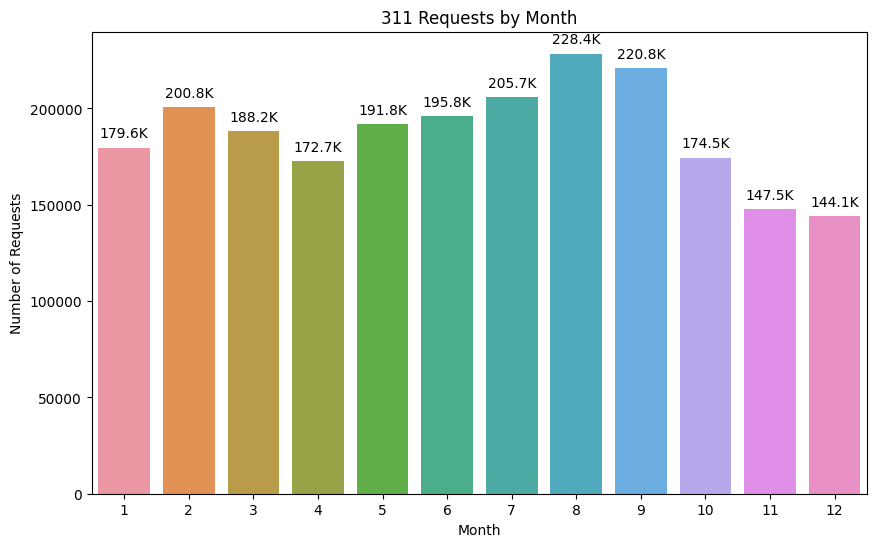

In [13]:
# volume by month
plt.figure(figsize=(10, 6))
fig = sns.countplot(x=df['open_dt'].dt.month, data=df)
fig.set_title('311 Requests by Month')
fig.set_xlabel('Month')
fig.set_ylabel('Number of Requests')
# annotate bars
for p in fig.patches:
    fig.annotate(fmt(p.get_height()), (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.savefig('../../images/311_by_month.png', bbox_inches='tight')
plt.show()

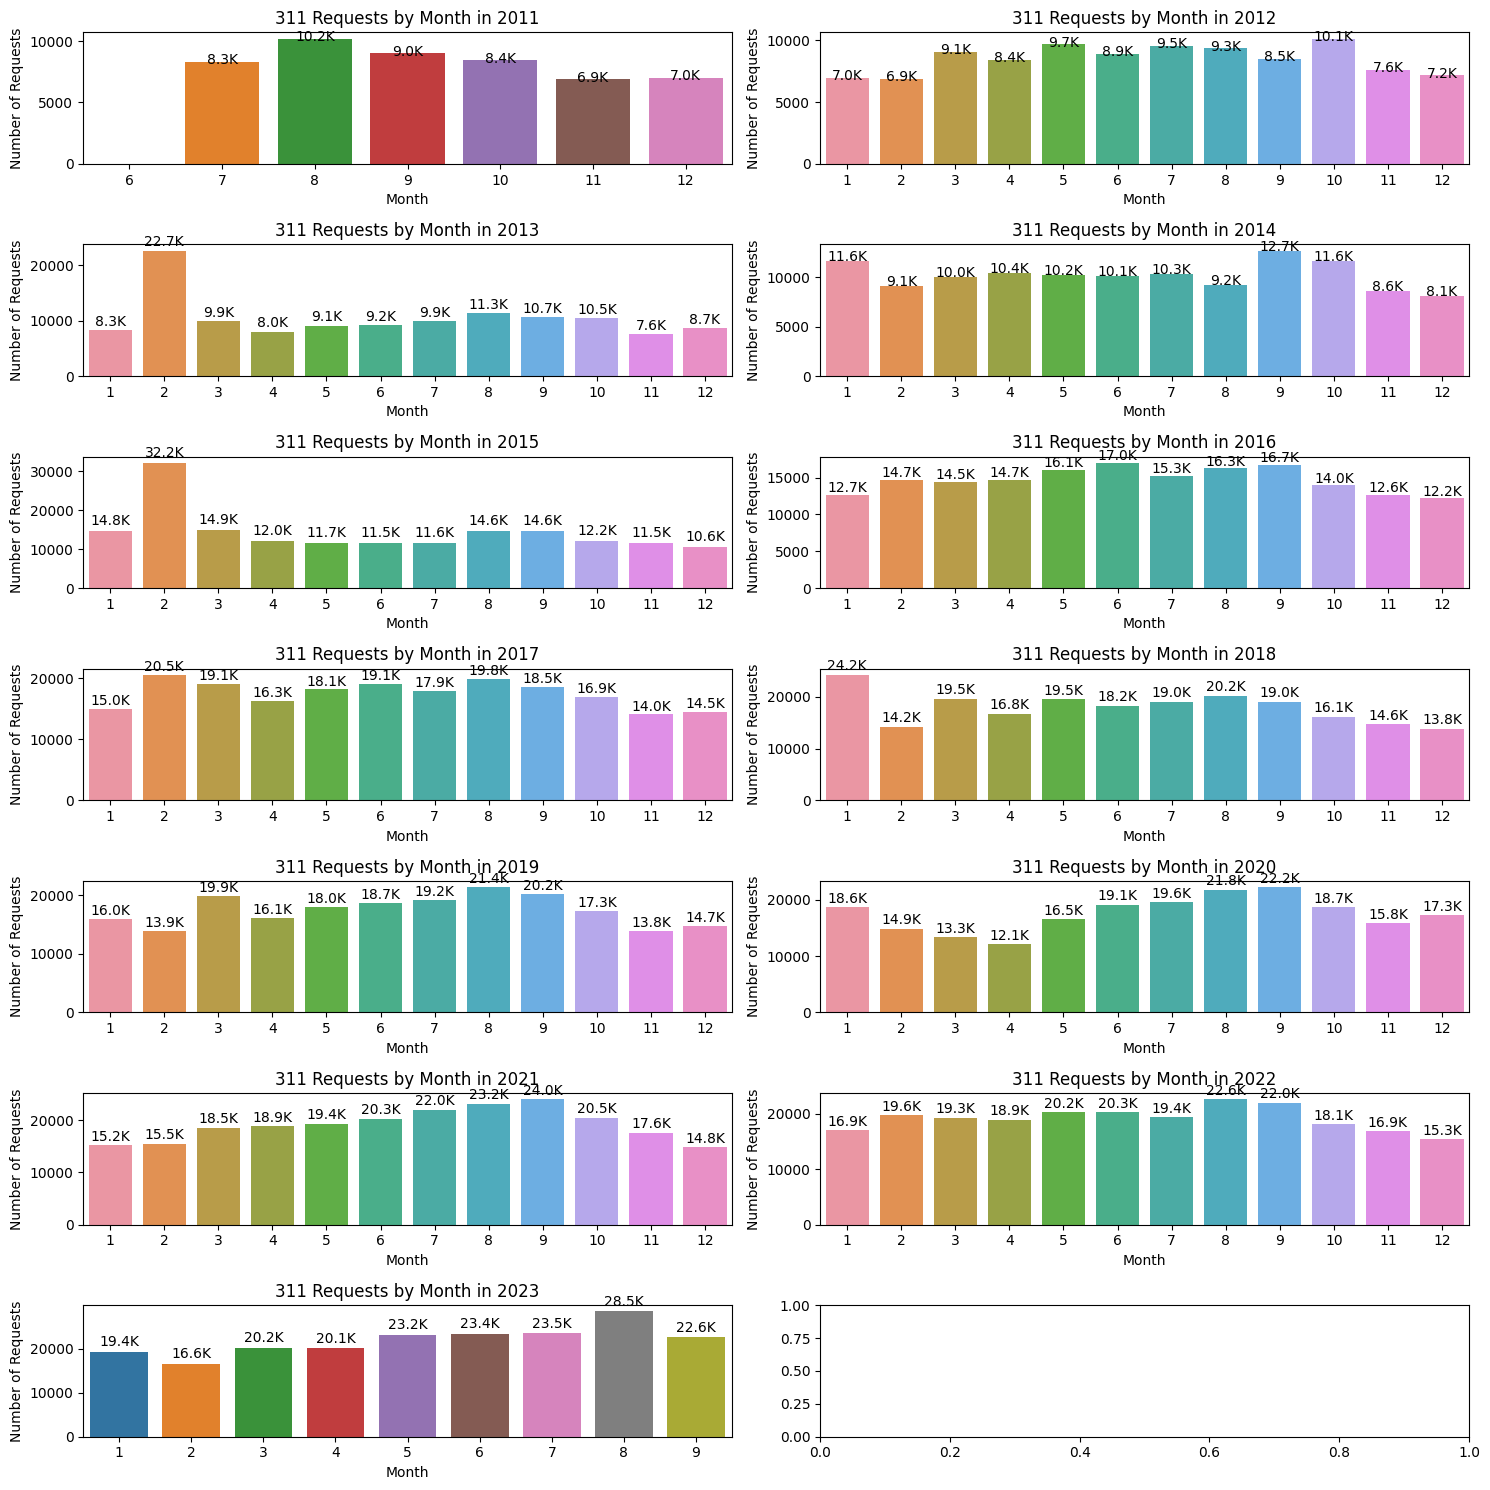

In [38]:
fig, ax = plt.subplots(7,2, figsize=(15, 15))

# volume by month by year

for i, year in enumerate(df['open_dt'].dt.year.unique()):
    fig = sns.countplot(x=df[df['open_dt'].dt.year == year]['open_dt'].dt.month, data=df[df['open_dt'].dt.year == year], ax=ax[i//2][i%2])
    fig.set_title('311 Requests by Month in {}'.format(year))
    fig.set_xlabel('Month')
    fig.set_ylabel('Number of Requests')
    # annotate bars
    for p in fig.patches:
        fig.annotate(fmt(p.get_height()), (p.get_x() + p.get_width()/2., p.get_height() - 1000), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.savefig('../../images/311_by_month_by_year.png', bbox_inches='tight')
plt.show()

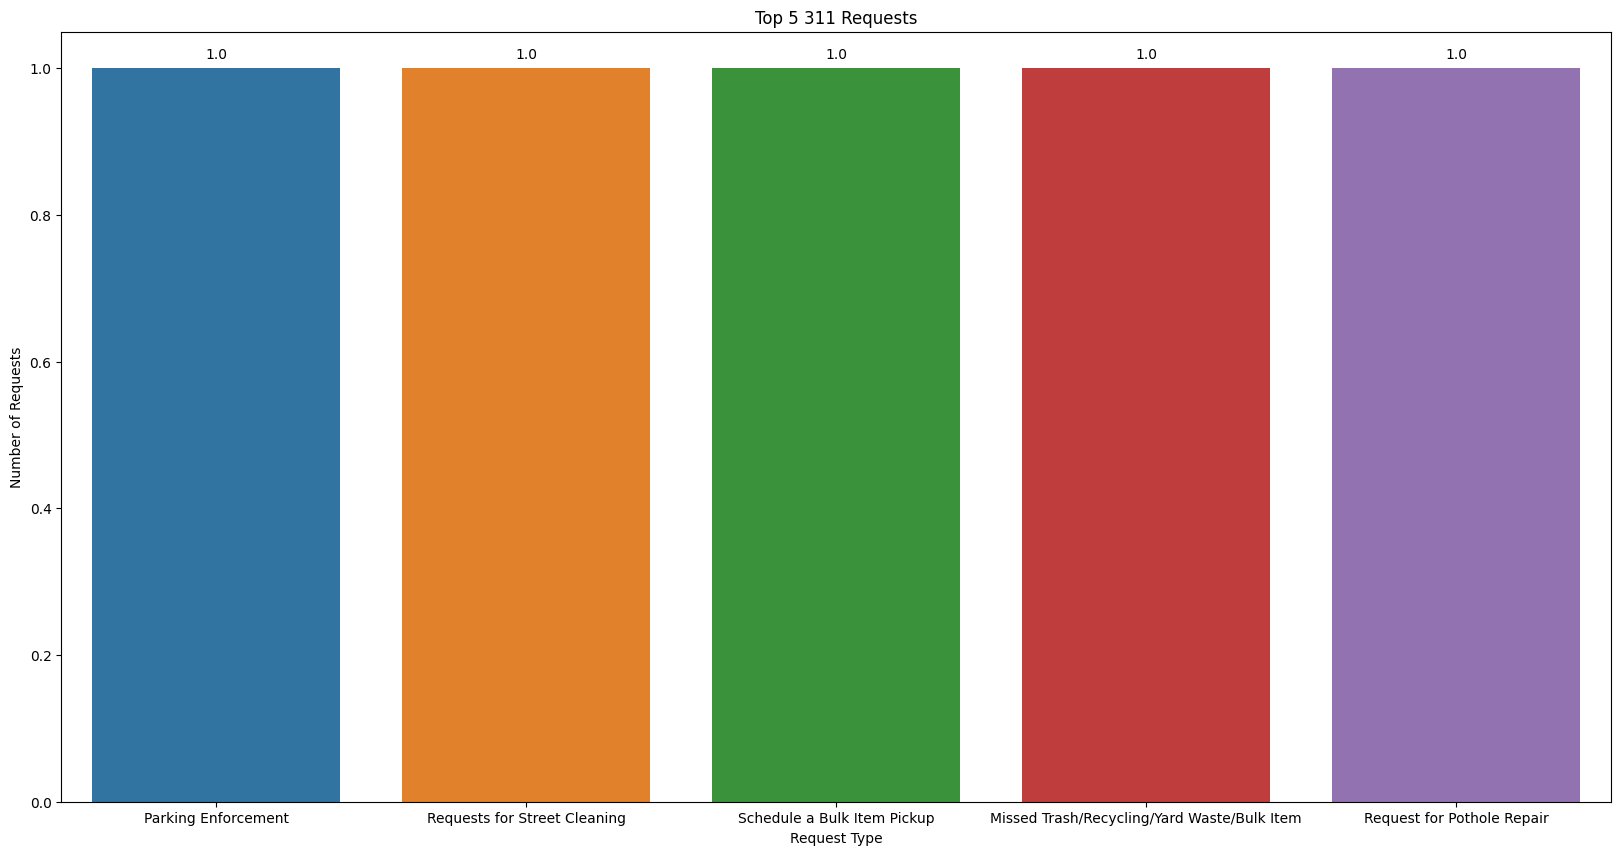

In [40]:
# top 5 requests
plt.figure(figsize=(20, 10))
fig = sns.countplot(x=df['type'].value_counts().head(5).index, data=df)
fig.set_title('Top 5 311 Requests')
fig.set_xlabel('Request Type')
fig.set_ylabel('Number of Requests')
# annotate bars
for p in fig.patches:
    fig.annotate(fmt(p.get_height()), (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.savefig('../../images/top_5_311_requests.png', bbox_inches='tight')
plt.show()

<Axes: xlabel='type', ylabel='count'>

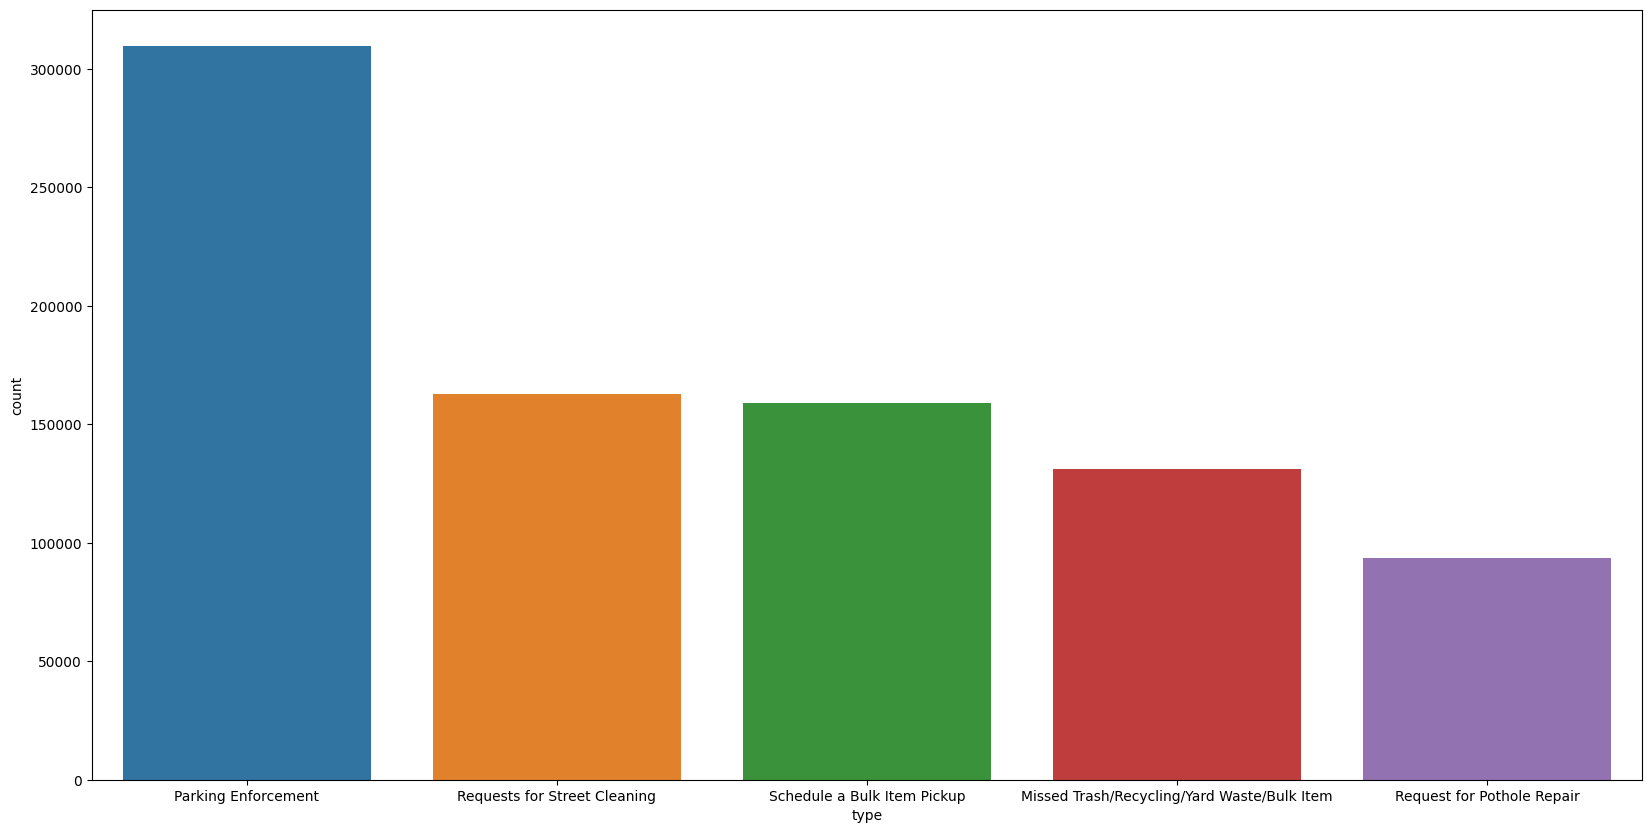

In [43]:
plt.figure(figsize=(20, 10))
sns.countplot(data=df,x=df['type'], order=df['type'].value_counts().head(5).index)

In [44]:
df['type'].value_counts().head(5)

type
Parking Enforcement                            309512
Requests for Street Cleaning                   162824
Schedule a Bulk Item Pickup                    158880
Missed Trash/Recycling/Yard Waste/Bulk Item    131108
Request for Pothole Repair                      93628
Name: count, dtype: int64

In [47]:
list(df['source'].value_counts().index)

['Constituent Call',
 'Citizens Connect App',
 'City Worker App',
 'Self Service',
 'Employee Generated',
 'Maximo Integration',
 'Twitter']